<center>

## <font color='darkblue'> ASTR 21100/31200
    
<center>

## <font color='darkblue'> Homework Assignment 3
    
<center>
    
## <font color='darkblue'> Approximating 1D functions using interpolation and regression

<center>
 
## <font color='darkblue'> undergraduate students (30 points + 7 extra-credit)
    
<center>
    
### <font color='darkblue'> Distributed: Friday, April 15
    
<center>

### <font color='darkblue'> Due: Friday, Apr 22, 9pm

<center>

#### <font color='black'> Humza Qureshi (hqureshi)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from math import pi,e
from scipy.integrate import romberg
from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.io import fits
from scipy import constants
import warnings
import sys
from os.path import dirname
from os.path import join

%matplotlib inline
warnings.filterwarnings('ignore')

def plot_pretty(dpi=200,fontsize=10):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

## <font color='darkblue'> Exercise 1 (18 points): developing a function for constructing a polynomial or spline approximation of a function of 1 variable $f(x)$ 

**Task 1a. (10 points)** Implement a function that constructs approximation using global polynomial or piecewise spline using input vector of training values and evaluate the approximation at an input set of test values of $x$. 

Below is a suggested format of the function. Examine the docstring (its header) for specifications for how the function should work. 

In [27]:
def poly_fit(xtr, ftr,  method='polynomial', porder=None, s=0.):
    assert method in ['polynomial','splint','splreg']
    if method == 'polynomial':
        assert porder != None
        if type(porder) is str:
            assert porder == 'interp'
            porder  = xtr.size - 1
        else:
            assert 0 <= porder and porder < xtr.size
        if porder == xtr.size - 1:
            coefficients = np.transpose(np.array([xtr**i for i in range(0,xtr.size)]))
            solved = np.linalg.solve(coefficients,ftr)
            return np.poly1d(solved[::-1])
        else:
            return np.poly1d(np.polyfit(xtr,ftr,porder))

    elif method == 'splint':
        assert porder in [0,1,2,3]
        return scipy.interpolate.interp1d(xtr,ftr,kind = ['zero','slinear','quadratic','cubic'][porder])
    elif method == 'splreg':
        if porder == None:
            porder = 3
        assert 1 <= porder and porder <= 5
        return scipy.interpolate.UnivariateSpline(xtr,ftr,k=porder,s=s)

In [28]:
min,max = 0.,2*pi
ntr = 30
cont_amount = 300
xtr = np.linspace(min, max, ntr)
ftr = np.sin(xtr)
x_cont = np.sort(np.concatenate([xtr,np.linspace(min,max,cont_amount)]))

cont_sin = np.sin(x_cont)

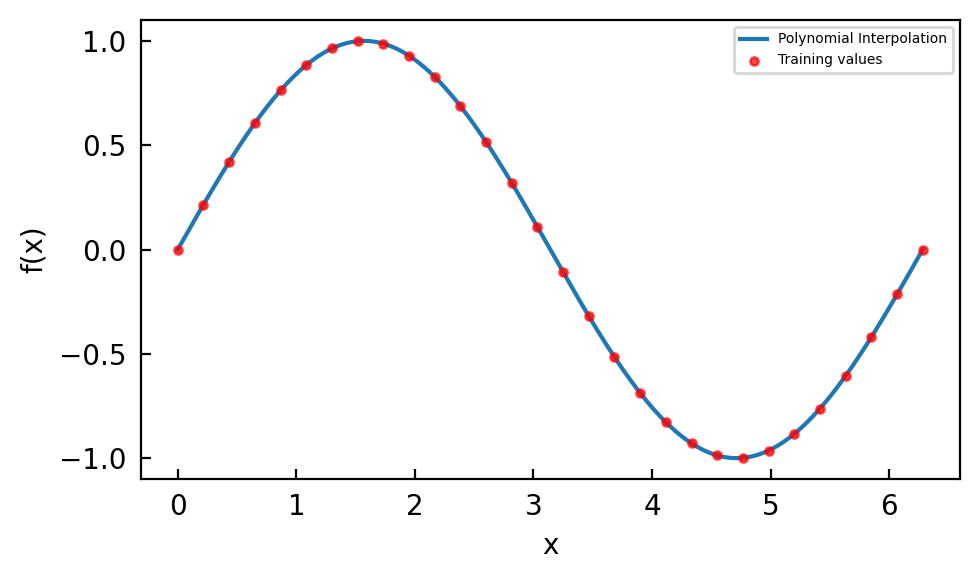

In [29]:
poly_interp = poly_fit(xtr,ftr,porder='interp',method='polynomial')

plt.scatter(xtr,ftr,s=8,color="red",label="Training values",alpha=0.7,zorder=1)

plt.plot(x_cont,poly_interp(x_cont),label="Polynomial Interpolation",zorder=0)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.tight_layout()
plt.show()

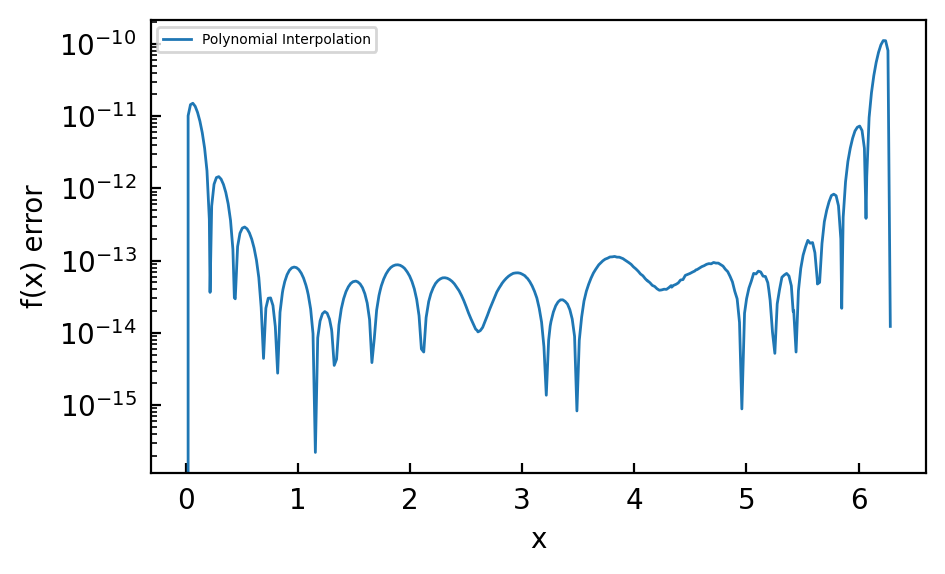

In [30]:
plt.plot(x_cont,np.abs(poly_interp(x_cont)-cont_sin),label="Polynomial Interpolation",linewidth=1)

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x) error")
plt.yscale('log')
plt.show()

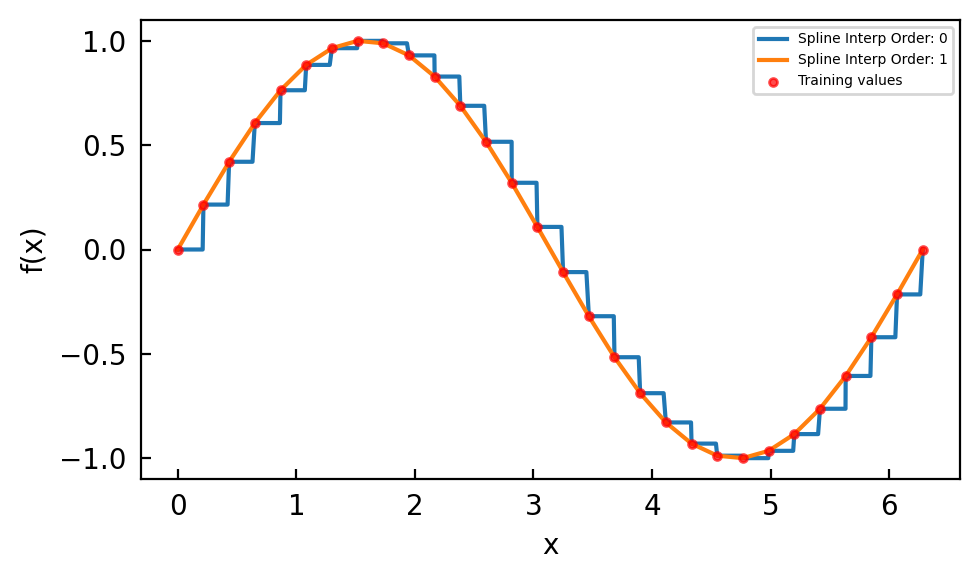

In [31]:
plt.scatter(xtr,ftr,s=8,color="red",label="Training values",alpha=0.7,zorder=1)
splines = []
for order in range(0,4):
    spline_interp = poly_fit(xtr,ftr,porder=order,method='splint')
    splines.append(spline_interp)

for order in range(0,2):
    plt.plot(x_cont,splines[order](x_cont),label="Spline Interp Order: " + str(order),zorder=0)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.tight_layout()
plt.show()

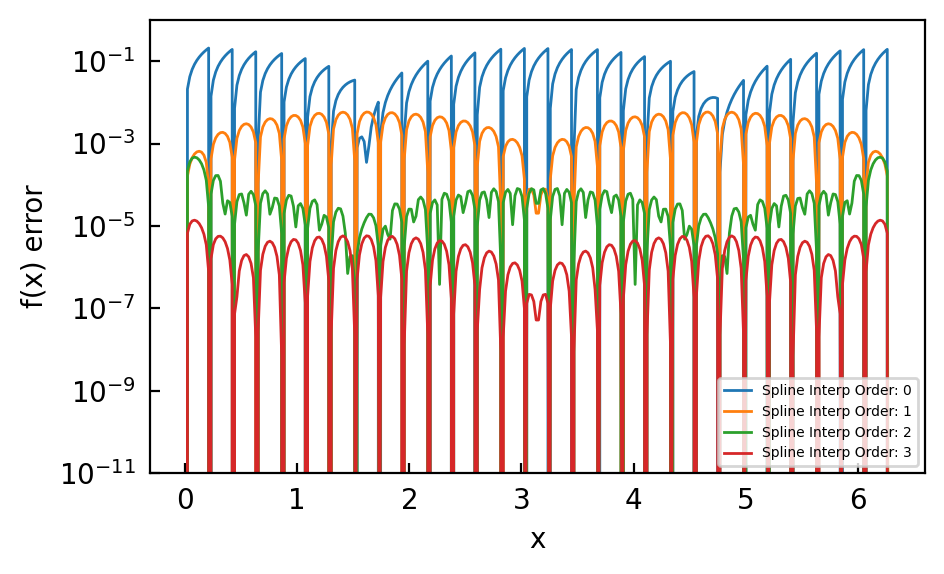

In [32]:
for order,spline in enumerate(splines):
    plt.plot(x_cont,np.abs(spline(x_cont)-cont_sin),label="Spline Interp Order: " + str(order),linewidth=1)

plt.xlabel("x")
plt.ylabel("f(x) error")
plt.ylim(1e-11,1)
plt.yscale('log')
plt.legend(loc="lower right")
plt.show()

In [33]:
def ftrain(x, scale=0.5):
    return 1.5*x + np.sin(x) + np.random.normal(scale=scale, size=np.size(x))

ntr = 30
min,max = 1.,6.
cont_amount = 100
xtr = np.linspace(min, max, ntr)
ftr = ftrain(xtr, scale=1.)
x_cont = np.sort(np.concatenate([xtr,np.linspace(min,max,cont_amount)]))

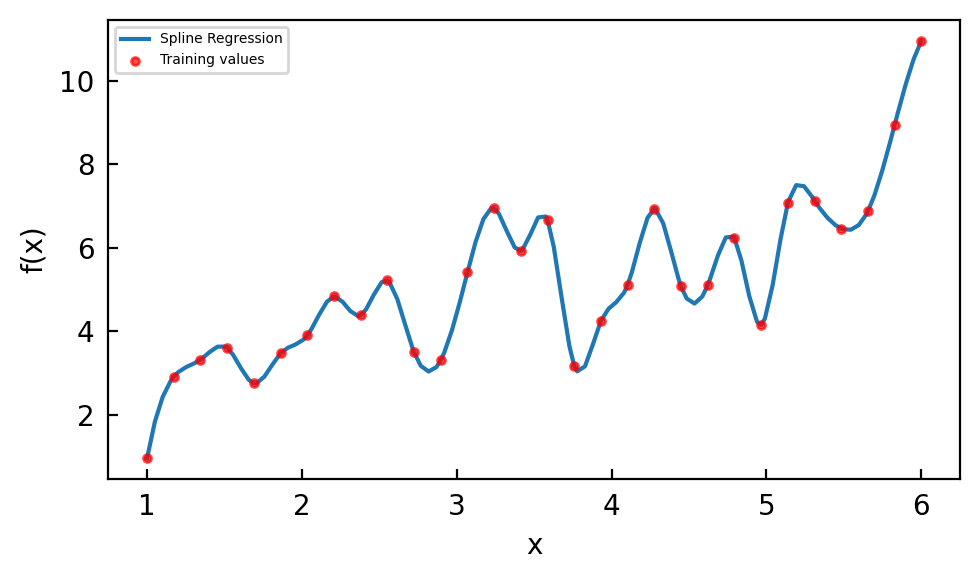

In [34]:
splreg = poly_fit(xtr,ftr,method='splreg')
plt.scatter(xtr,ftr,s=8,color="red",label="Training values",alpha=0.7,zorder=1)

plt.plot(x_cont,splreg(x_cont),label="Spline Regression",zorder=0)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.tight_layout()
plt.show()

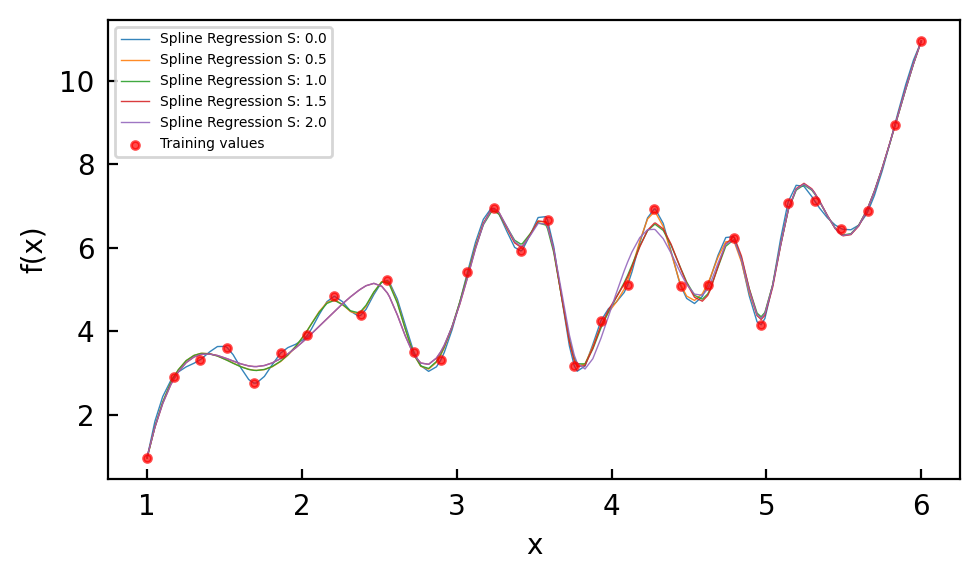

In [35]:
plt.scatter(xtr,ftr,s=8,color="red",label="Training values",alpha=0.7,zorder=1)

for s in np.linspace(0,2,5):
    splreg = poly_fit(xtr,ftr,method='splreg',s=s)
    plt.plot(x_cont,splreg(x_cont),label="Spline Regression S: " + str(s),zorder=0,linewidth=0.5,alpha=0.9)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

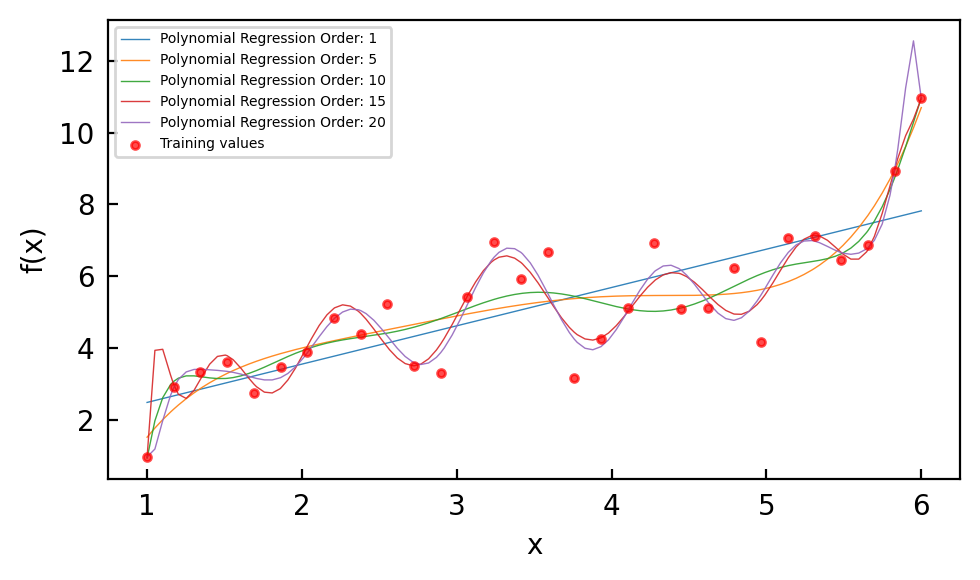

In [36]:
plt.scatter(xtr,ftr,s=8,color="red",label="Training values",alpha=0.7,zorder=1)

for s in np.linspace(1,20,5,dtype=np.int):
    splreg = poly_fit(xtr,ftr,method='polynomial',porder=s)
    plt.plot(x_cont,splreg(x_cont),label="Polynomial Regression Order: " + str(s),zorder=0,linewidth=0.5,alpha=0.9)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

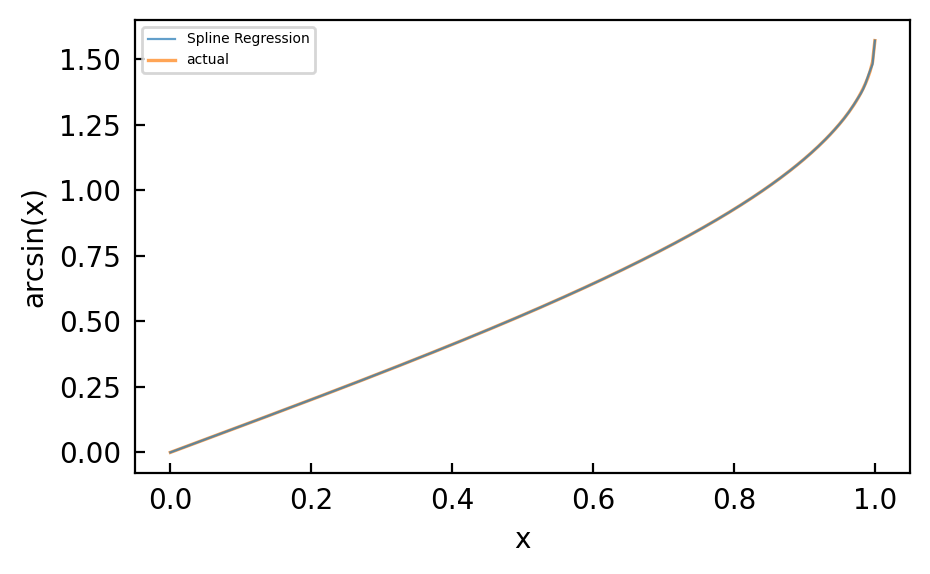

In [37]:
min,max = 0.,pi/2
ntr = 30
cont_amount = 300
xtr = np.linspace(min, max, ntr)
ftr = np.sin(xtr)

spline_interp = poly_fit(ftr,xtr,method='splreg')

x_cont = np.linspace(0,1,cont_amount)
y_cont = np.arcsin(x_cont)

plt.plot(x_cont,spline_interp(x_cont),label="Spline Regression",zorder=1,linewidth=0.8,alpha=0.7)
plt.plot(x_cont,y_cont,label="actual",zorder=0,linewidth=1.2,alpha=0.7)
plt.xlabel("x")
plt.ylabel("arcsin(x)")
plt.legend()
plt.show()

# Question 2

In [38]:
def trapzd(func,a,b,nsteps,*args):
    h = (b-a)/nsteps

    if nsteps == 1:
        return 0.5*(func(a, *args) + func(b, *args)) * h
    else:
        xd = a + np.arange(1,nsteps) * h
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd, *args))) * h

def rom_recursive(func,a,b,m,nsteps,*args):
    if m == 0:
        return trapzd(func,a,b,nsteps,*args)
    return (1/((4**m) - 1)) * ((4**m)*rom_recursive(func,a,b,m-1,nsteps*2) - rom_recursive(func,a,b,m-1,nsteps))

def int_rom(func,a,b,max_m=50,rtol=1.e-6):
    last = rom_recursive(func,a,b,0,1)
    err = 0
    for m in range(1,max_m+1):
        current = rom_recursive(func,a,b,m,1)
        if current == 0:
            return current,err
        else:
            err = np.abs(1. - last/current)
            if err < rtol:
                return current,err
        last = current
    return current,err

def d_l(z,int_function=int_rom,rtol=1.e-8,H0=70.0,Om0=0.3,OmL=0.7,clight=None):
    units = False
    if clight == None:
        try:
            clight = (constants.speed_of_light * (u.meter/u.second)).to(u.km/u.second)
            H0 = H0 * ((u.km/u.second)/u.Mpc)
        except:
            clight = 2.99792458e5


    if OmL == 0:
        assert(Om0 >= 0)
        q0 = 0.5 * Om0
        q0z = q0 * z
        return clight * z/H0 * (1. + (z-q0z) / (1. + q0z + np.sqrt(1. + 2.*q0z)))
    else:
        OmK = 1 - Om0 - OmL
        def f(x):
            E = np.sqrt(Om0*((1+x)**3) + OmK*((1+x)**2) + OmL)
            return 1/E
        dc,err = int_function(f,0,z,rtol=rtol)
        if OmK > 0:
            dc = (1/np.sqrt(OmK)) * np.sinh(np.sqrt(OmK) * dc)
        elif OmK < 0:
            dc = (1/np.sqrt(np.abs(OmK))) * np.sin(np.sqrt(np.abs(OmK)) * dc)

        return dc * (clight/H0) * (1+z)

In [39]:
def d_l_astropy(z, H0=70.0, Om0=0.3, OmL=0.7):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z)

z = 1
Om0 = 0.3
H0 = 70

min,max = 0,1
n_test_points = 1000

test_xs = np.linspace(min,max,n_test_points)
test_ys = []
for i in test_xs:
    test_ys.append(d_l(z=z,H0=H0,Om0=Om0,OmL = i).value)
test_ys = np.array(test_ys)


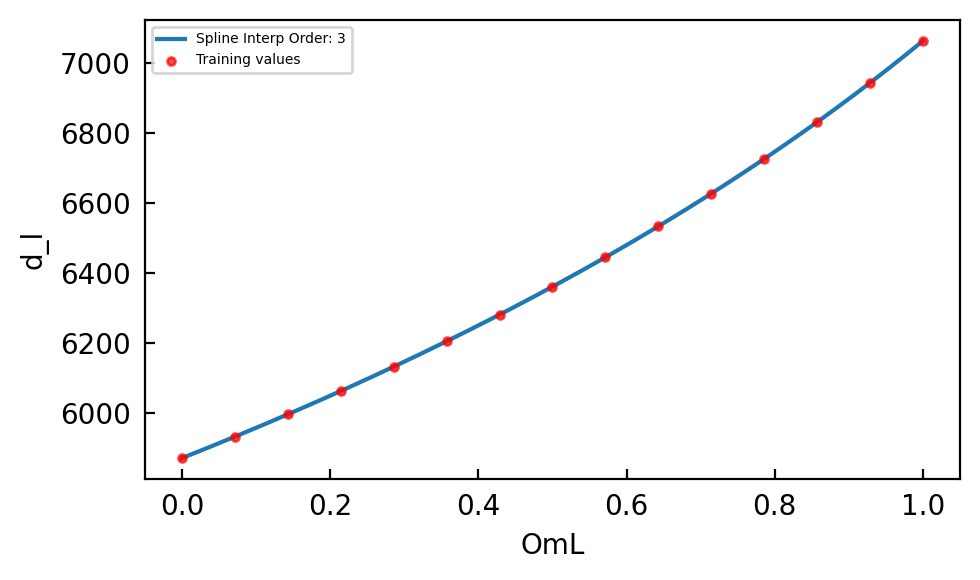

In [40]:
n_training_points = 15

training_xs = np.linspace(min,max,n_training_points)
training_ys = []
for i in training_xs:
    training_ys.append(d_l(z=z,H0=H0,Om0=Om0,OmL = i).value)
training_ys = np.array(training_ys)

approximation = poly_fit(training_xs,training_ys,method="splint",porder=3)

plt.plot(test_xs,approximation(test_xs),zorder=0,label="Spline Interp Order: 3")

plt.scatter(training_xs,training_ys,s=8,color="red",label="Training values",alpha=0.7,zorder=1)

plt.xlabel("OmL")
plt.ylabel("d_l")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

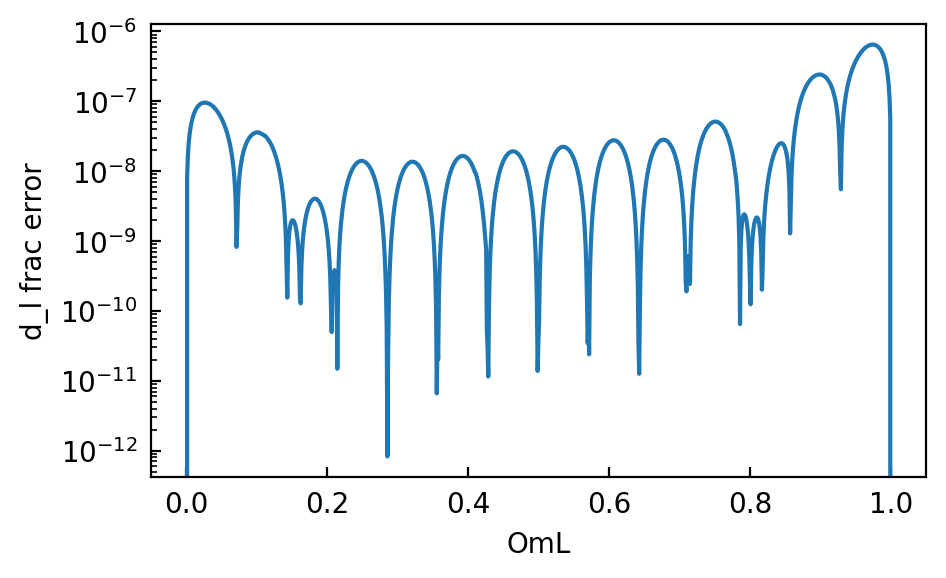

In [41]:
plt.plot(test_xs,np.abs(1.-approximation(test_xs)/test_ys))
plt.xlabel("OmL")
plt.ylabel("d_l frac error")
plt.yscale('log')
plt.show()

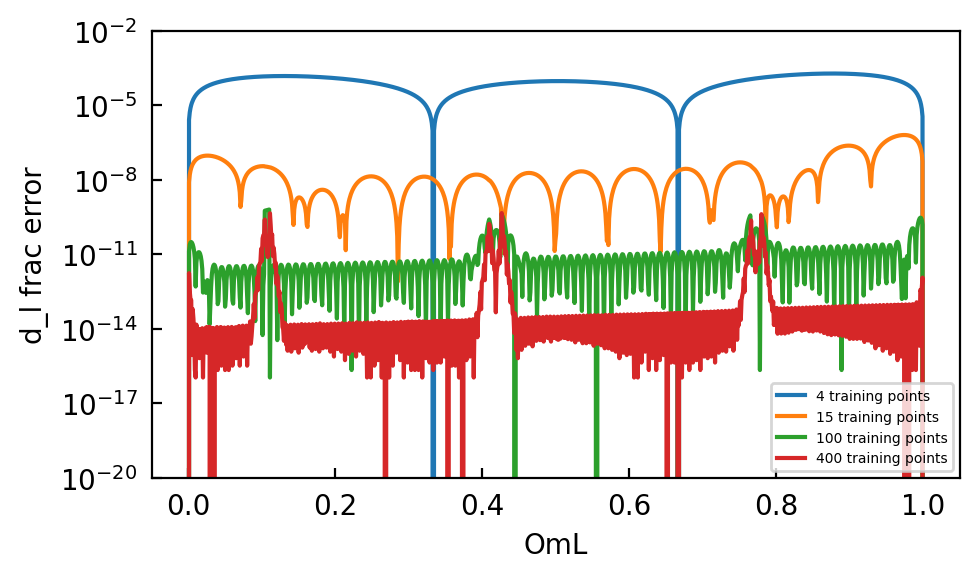

In [42]:
for n_points in [4,15,100,400]:
    training_xs = np.linspace(min,max,n_points)
    training_ys = []
    for i in training_xs:
        training_ys.append(d_l(z=z,H0=H0,Om0=Om0,OmL = i).value)
    training_ys = np.array(training_ys)

    approximation = poly_fit(training_xs,training_ys,method="splint",porder=3)
    plt.plot(test_xs,np.abs(1.-approximation(test_xs)/test_ys),label=str(n_points) + " training points")

plt.xlabel("OmL")
plt.ylabel("d_l frac error")
plt.ylim(1e-20,1e-2)
plt.yscale('log')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### As number of training points increases, the error decreases.
### The lowest accuracy we can get is around 10e-3 to 10e-4 with 4 training points (this is the lowest as we need at least 4 training points for spline interpolation)

### <font color='blue'>Exercise 3: regression approximation to the correlation of galaxy masses and rotation velocities (known as the Tully-Fisher relation)  (7 points)</font>

**Task** Use your function developed in exercise 1 to construct a smooth approximation of the main trend to the correlation described above using data read and shown below using 1) polynomial and 2) spline regression. 
    
    
* Add your approximation as a line to the plot below showing data with points.     

    
* Try different porder and $s$ parameter values to choose approximation that seems to describe the trend shown by points best. Present your best choice in the final plots. 
    
    
* Include a brief discussion of what you observed when you experimented with order and $s$.

In [43]:
url = 'http://astro.uchicago.edu/~andrey/classes/a205/data/bradford16_fig1.fits'
b16 = fits.getdata(url)

# width of the HI 21 cm line = proxy for rotation velocity in km/s
vrot = b16['VW20I'];
# log of Vrot sorted in increasing value
isort = np.argsort(vrot)
x = np.log10(vrot)
# log10 of the gas mass and star mass (aka the "baryons")
y = b16['MBARYON'];
x, y = x[isort], y[isort]

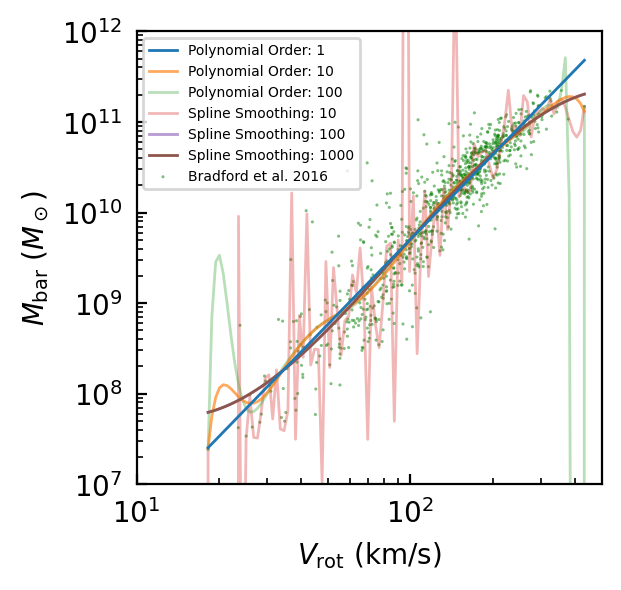

In [44]:
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([10.,500.]); plt.ylim([1.e7,1.e12])
plt.xlabel(r'$V_{\rm rot}\rm\ (km/s)$'); plt.ylabel(r'$M_{\rm bar}\ (M_\odot)$')
plt.scatter(10**x, 10.**y,marker='.',c='green',s=5.,alpha=0.5,edgecolor='none', label='Bradford et al. 2016',zorder=0)

orders = [1,10,100]
smoothings = [10,100,1000]
for idx,order in zip(list(range(len(orders)))[::-1],orders):
    poly_regression = poly_fit(x,y,method="polynomial",porder=order)

    n_xs = 100
    min,max = np.min(x),np.max(x)
    xs = np.linspace(min,max,n_xs)
    plt.plot(10**xs,10**poly_regression(xs),label="Polynomial Order: " + str(order),zorder=2+idx,linewidth=1,alpha=(idx+1)/len(orders))
for idx,smoothing in enumerate(smoothings):
    spline_regression = poly_fit(x,y,method="splreg",s=smoothing)

    n_xs = 100
    min,max = np.min(x),np.max(x)
    xs = np.linspace(min,max,n_xs)
    plt.plot(10**xs,10**spline_regression(xs),label="Spline Smoothing: " + str(smoothing),zorder=1+idx,linewidth=1,alpha=(idx+1)/len(smoothings))

plt.legend(loc='upper left')
plt.show()

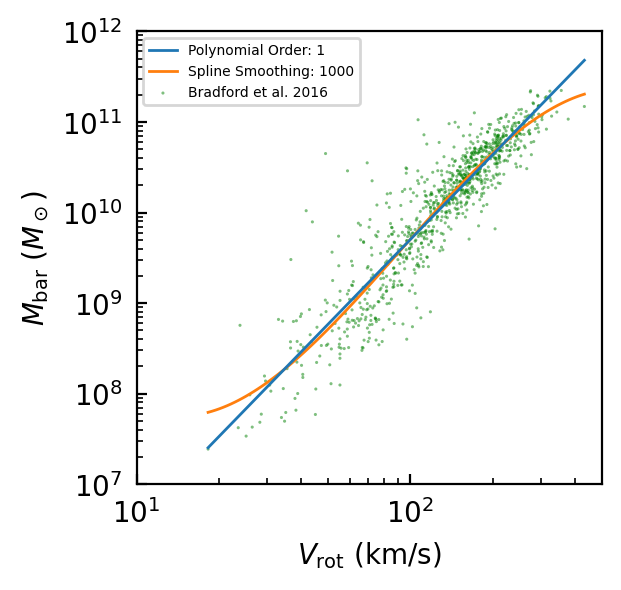

In [45]:
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([10.,500.]); plt.ylim([1.e7,1.e12])
plt.xlabel(r'$V_{\rm rot}\rm\ (km/s)$'); plt.ylabel(r'$M_{\rm bar}\ (M_\odot)$')
plt.scatter(10**x, 10.**y,marker='.',c='green',s=5.,alpha=0.5,edgecolor='none', label='Bradford et al. 2016',zorder=0)

orders = [1]
smoothings = [1000]
for order,smoothing in zip(orders,smoothings):
    poly_regression = poly_fit(x,y,method="polynomial",porder=order)
    spline_regression = poly_fit(x,y,method="splreg",s=smoothing)

    n_xs = 100
    min,max = np.min(x),np.max(x)
    xs = np.linspace(min,max,n_xs)
    plt.plot(10**xs,10**poly_regression(xs),label="Polynomial Order: " + str(order),zorder=2,linewidth=1)
    plt.plot(10**xs,10**spline_regression(xs),label="Spline Smoothing: " + str(smoothing),zorder=1,linewidth=1)

plt.legend(loc='upper left')
plt.show()

# Question 4

### <font color='blue'>Exercise 4. Extra-credit (7 points): Using regression approximation for detrending lightcurves.</font>


***Background.*** Brightness of many astronomical sources varies. In observations apparent (observed) brightness is measured as apparent magnitude $m$ that are related to energy flux in a given wavelength range $f$ as: $m=-2.5\log_{10}f + {\rm const}$, where ${\rm const}$ is a normalizing constant that defines *magnitude system*. 

Change of $m$ as a function of time for a source with a significantly varying brightness is called *lightcurve*. Lightcurves of variable stars is used to learn about physics of interior of these stars. In binary stars, occultations by one star of another which is reflected as a change of brightness of the system, lightcurves can be used to deduce orbital properties of the binary stars. Planets in some exoplanetary systems around some stars that are favorably oriented can block stars of the primary star in the system, which manifests as dips in the lightcurves of such stars. Detections of such dips was one of the main methods of finding exoplanets. 

When lightcurves are measured they are often subject to observational biases induced by instruments and real long-term changes of an object that are not related to the changes on short time scales such as dips. It is often useful or even required to remove such long term trends before searching for changes on short time scales. Such removal is called ***detrending***. 

<img width=600 src="https://github.com/dwkim78/pdtrend/blob/master/pdtrend/datasets/images/PDT_logo.png?raw=true"></img>


In this exercise, you can use the approximation function you implemented in exercise 1 to detrend a lightcurve. 

**Task.** Code below downloads a set of lightcurves from the study of [Kim et al. 2009](https://ui.adsabs.harvard.edu/abs/2009MNRAS.397..558K/abstract). It shows how to select one lightcurve and plot it as a scatter plot (points). 

* Use the approximation function you implemented in exercise 1 to carry out 1) polynomial regression and 2) spline regression of the lightcurve using x and y vectors defined below. Overplot your approximation over points using plt.plot

* Make a separate plot showing detrended flux, defined as original flux - approximation. Make sure that the detrended plot does not show long term trends seen in the original light curves.


Experiment with different orders of polynomial and different $s$ values of the spline and identify the best order and $s$ value that works for detrended 

In [47]:
def load_lightcurve_set():
    """
    Return the set of light curves for testing pdtrend.
    Returns
    -------
    lcs : numpy.ndarray
        An array of light curves.
    """

    import bz2
    try:
        import cPickle as pickle
    except:
        import pickle
    import urllib.request

    # The light curves are bzipped and pickled.
    #file_path = 'data/lc.pbz2'
    file_path = 'http://astro.uchicago.edu/~andrey/classes/a211/data/lc.pbz2'
    # For Python 3.
    if sys.version_info.major >= 3:
        #lcs = pickle.load(bz2.BZ2File(file_path, 'r'), encoding='bytes')
        lcs = pickle.load(bz2.BZ2File(urllib.request.urlopen(file_path)), encoding='bytes')

    # For Python 2.
    else:
        lcs = pickle.load(bz2.BZ2File(file_path, 'r'))

    return lcs

In [53]:
# load lightcurves (in arbitrary units)
lcs = load_lightcurve_set()

# generate index of the time variable from 0 to the length of lightcurves
times = np.ones(lcs.shape) * np.arange(lcs.shape[1])

# select lightcurve number ilc (this can be index between 0 and 56)
ilc = 1
x, y = times[ilc], lcs[ilc]

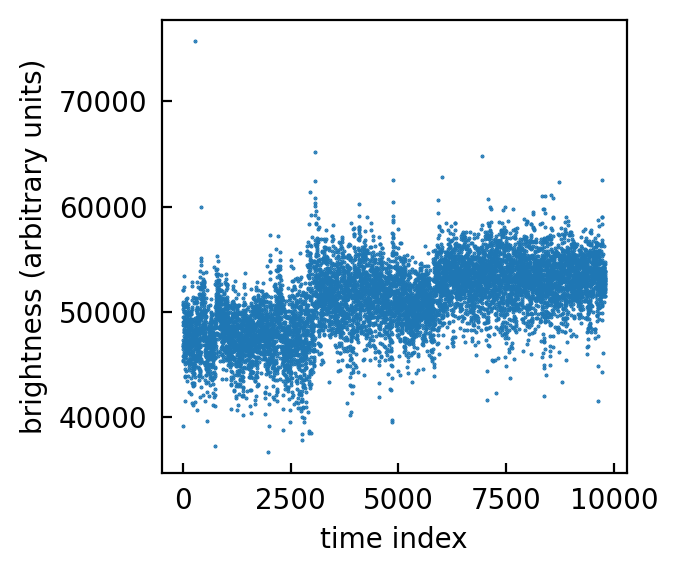

In [54]:
# plot lightcurve as a scatter plot
plt.figure(figsize=(3,3))
plt.xlabel('time index'); plt.ylabel('brightness (arbitrary units)')
plt.scatter(times[1], lcs[1], s=0.2)
plt.show()